In [3]:
# Import necessary libraries
import pandas as pd

# Load the EV charging station dataset
charging_station_df = pd.read_csv("electric_vehicle_charging_station_list.csv")

# Display the first few rows of the dataset to understand its structure
print(charging_station_df.head())

# Display summary statistics of the dataset
print(charging_station_df.describe())





   no region                                            address  \
0   1   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
1   2   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
2   3   NDMC  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...   
3   4   NDMC  Opposite Dory Pharmacy, Khanna Market, Aliganj...   
4   5   NDMC  Opposite Goel Opticals, Khanna Market, Aliganj...   

                                          aux addres   latitude  longitude  \
0  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
1  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
2  Electric Vehicle Charger, Outside RWA Park, Jo...  28.588303  77.217697   
3  Electric Vehicle Charger, Opposite Dory Pharma...  28.582654  77.220087   
4  Electric Vehicle Charger, Opposite Goel Optica...  28.584485  77.220316   

     type  power       service  
0  DC-001  15 kW  Self Service  
1  DC-001  15 kW  Self Service  
2  DC-001  15 kW  Self Servic

In [4]:
# Check for any missing values in the dataset
print(charging_station_df.isnull().sum())

no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64


In [5]:
# Explore unique values and distributions of categorical features
categorical_features = ['region', 'address', 'type', 'service']
for feature in categorical_features:
    print(f"Unique values for {feature}:")
    print(charging_station_df[feature].value_counts())
    print("\n")


Unique values for region:
region
NDMC               74
Noida Authority    53
SDMC               31
CMRL               16
NKDA               16
ANERT               6
NRANVP              4
Maha Metro          2
Name: count, dtype: int64


Unique values for address:
address
Outside Chelmsford Club/ Opposite CSIR Building, Rafi Marg, Sansad Marg Area, New Delhi 110001    6
Between kirti mann plaza and NMC hospital Sector 30 Noida                                         5
Gate No. 1, Lodhi Garden, Lodhi Estate, Lodhi Road, New Delhi 110003                              4
road between sector 124 & 125 and beside SPCl Sector Road, Noida, Uttar Pradesh, 201313           3
Sector 50  Central Market, Noida, Uttar Pradesh, 201305                                           3
                                                                                                 ..
Near Tata Advance Systems, sector- 59, Noida                                                      1
Op. C&R Textiles Ltd, sector

In [8]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Select features for clustering (latitude and longitude)
X = charging_station_df[['latitude', 'longitude']]

# Define the number of clusters
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
charging_station_df['cluster'] = cluster_labels

# Display the first few rows of the dataset with cluster labels
print(charging_station_df.head())

# Explore the distribution of charging stations in each cluster
print("Charging stations in each cluster:")
print(charging_station_df['cluster'].value_counts())


   no region                                            address  \
0   1   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
1   2   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
2   3   NDMC  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...   
3   4   NDMC  Opposite Dory Pharmacy, Khanna Market, Aliganj...   
4   5   NDMC  Opposite Goel Opticals, Khanna Market, Aliganj...   

                                          aux addres   latitude  longitude  \
0  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
1  Electric Vehicle Charger, Prithviraj Market, R...  28.600725  77.226252   
2  Electric Vehicle Charger, Outside RWA Park, Jo...  28.588303  77.217697   
3  Electric Vehicle Charger, Opposite Dory Pharma...  28.582654  77.220087   
4  Electric Vehicle Charger, Opposite Goel Optica...  28.584485  77.220316   

     type  power       service  cluster  
0  DC-001  15 kW  Self Service        1  
1  DC-001  15 kW  Self Service        1  
2 

In [12]:
# Extract numeric part from 'power' column
charging_station_df['power'] = charging_station_df['power'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Now 'power' column contains only the numeric kilowatt values


In [14]:
charging_station_df

,no,region,address,aux addres,latitude,longitude,type,power,service,cluster
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15.0,Self Service,1
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15.0,Self Service,1
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15.0,Self Service,1
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15.0,Self Service,1
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15.0,Self Service,1
...,...,...,...,...,...,...,...,...,...,...
197,198,ANERT,"State Council For Child Welfare, CV Raman Pill...","Electric Vehicle Charger, State Council For Ch...",8.491622,76.956247,CCS/ChADEMO/ Type 2 AC,142.0,Self Service,3
198,199,ANERT,"Shanghumukham beach, thiruvananthapuram,Kerala...","Electric Vehicle Charger, Shanghumukham beach,...",8.481051,76.912622,DC-001,15.0,Self Service,3
199,200,ANERT,"KTDC Tourist Reception Centre Shanmugham road,...","Electric Vehicle Charger, KTDC Tourist Recepti...",9.976921,76.277781,DC-001,15.0,Self Service,3
200,201,ANERT,"State Council For Child Welfare, CV Raman Pill...","Electric Vehicle Charger, State Council For Ch...",8.491622,76.956247,DC-001,15.0,Self Service,3


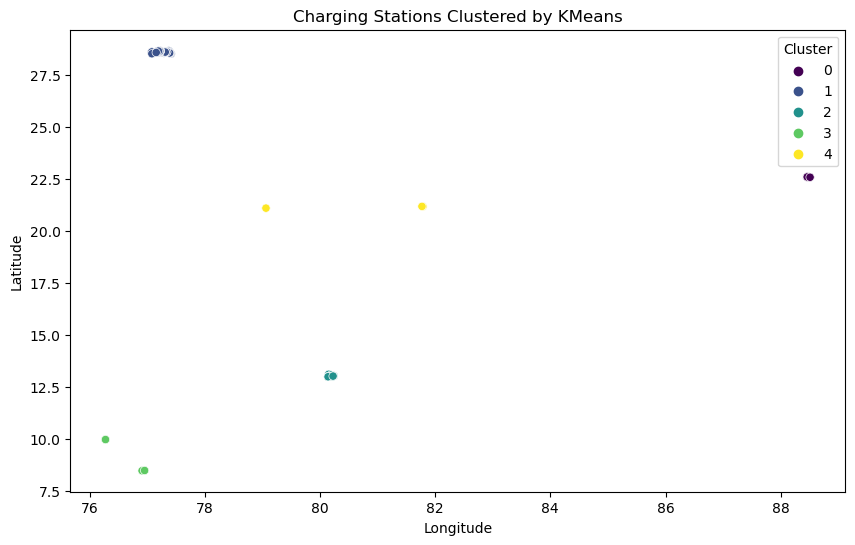

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster Profiling
cluster_profile = charging_station_df.groupby('cluster').agg({
    'power': 'mean',
    'service': lambda x: x.value_counts().index[0],  # Most common service type
    # Add more features for profiling if needed
})

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=charging_station_df, x='longitude', y='latitude', hue='cluster', palette='viridis')
plt.title('Charging Stations Clustered by KMeans')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

          no  power       service
cluster                          
0         16   10.0  Self Service
1        158   15.0  Self Service
2         16   15.0  Self Service
3          8  142.0  Self Service
4          4   15.0  Self Service


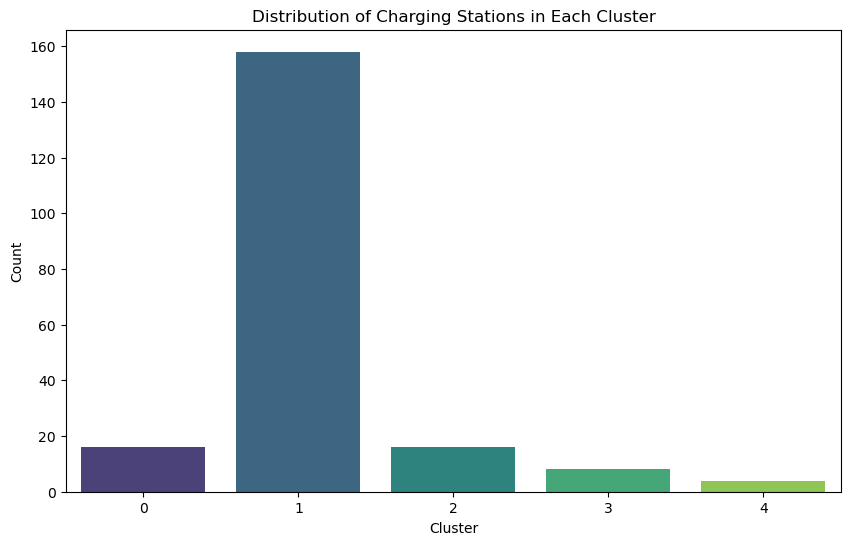

In [17]:
# Compute aggregate statistics for each cluster
cluster_stats = charging_station_df.groupby('cluster').agg({
    'no': 'count',                    # Count of charging stations
    'power': lambda x: x.mode()[0],  # Most common power capacity
    'service': lambda x: x.mode()[0] # Most common service type
})

# Display the cluster statistics
print(cluster_stats)

# Visualize the distribution of charging stations in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=charging_station_df, x='cluster', palette='viridis')
plt.title('Distribution of Charging Stations in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [19]:
pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 119.8 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/100.0 kB 122.9 kB/s eta 0:00:01
   -

In [21]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered at an approximate location
map_center = [28.6, 77.2]  # Latitude and longitude of New Delhi
ev_map = folium.Map(location=map_center, zoom_start=10)

# Create MarkerClusters for each cluster
marker_clusters = []
for cluster_num in charging_station_df['cluster'].unique():
    cluster_data = charging_station_df[charging_station_df['cluster'] == cluster_num]
    marker_cluster = MarkerCluster().add_to(ev_map)
    for index, row in cluster_data.iterrows():
        folium.Marker([row['latitude'], row['longitude']],
                      popup=f"Cluster: {row['cluster']} | Power: {row['power']} | Service: {row['service']}").add_to(marker_cluster)
    marker_clusters.append(marker_cluster)

# Display the map
ev_map
